In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [23]:
yf.pdr_override()
start = pd.Timestamp.now() - pd.DateOffset(years=8)
end = pd.Timestamp.now()
symbol = 'AAPL'  # Example symbol

# Download data
df = yf.download(symbol, start=start, end=end)
data = df.filter(['Close'])
dataset = data.values
dataset

[*********************100%%**********************]  1 of 1 completed


array([[ 26.78249931],
       [ 26.49250031],
       [ 26.42000008],
       ...,
       [168.        ],
       [167.03999329],
       [165.        ]])

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [25]:
training_data_len = int(np.ceil(len(dataset) * .70))
train_data = scaled_data[0:int(training_data_len), :]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [27]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\vinay\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1350/1350 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0017


In [28]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [29]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions).flatten()

valid = data[training_data_len:]
predictions = predictions[-len(valid):]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Text(0, 0.5, 'Volume')

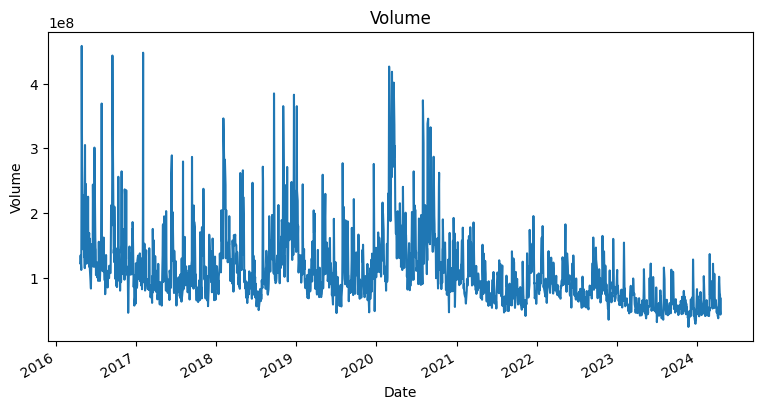

In [31]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
df['Volume'].plot()
plt.title('Volume')
plt.ylabel('Volume')

Text(0.5, 0, 'Daily Return')

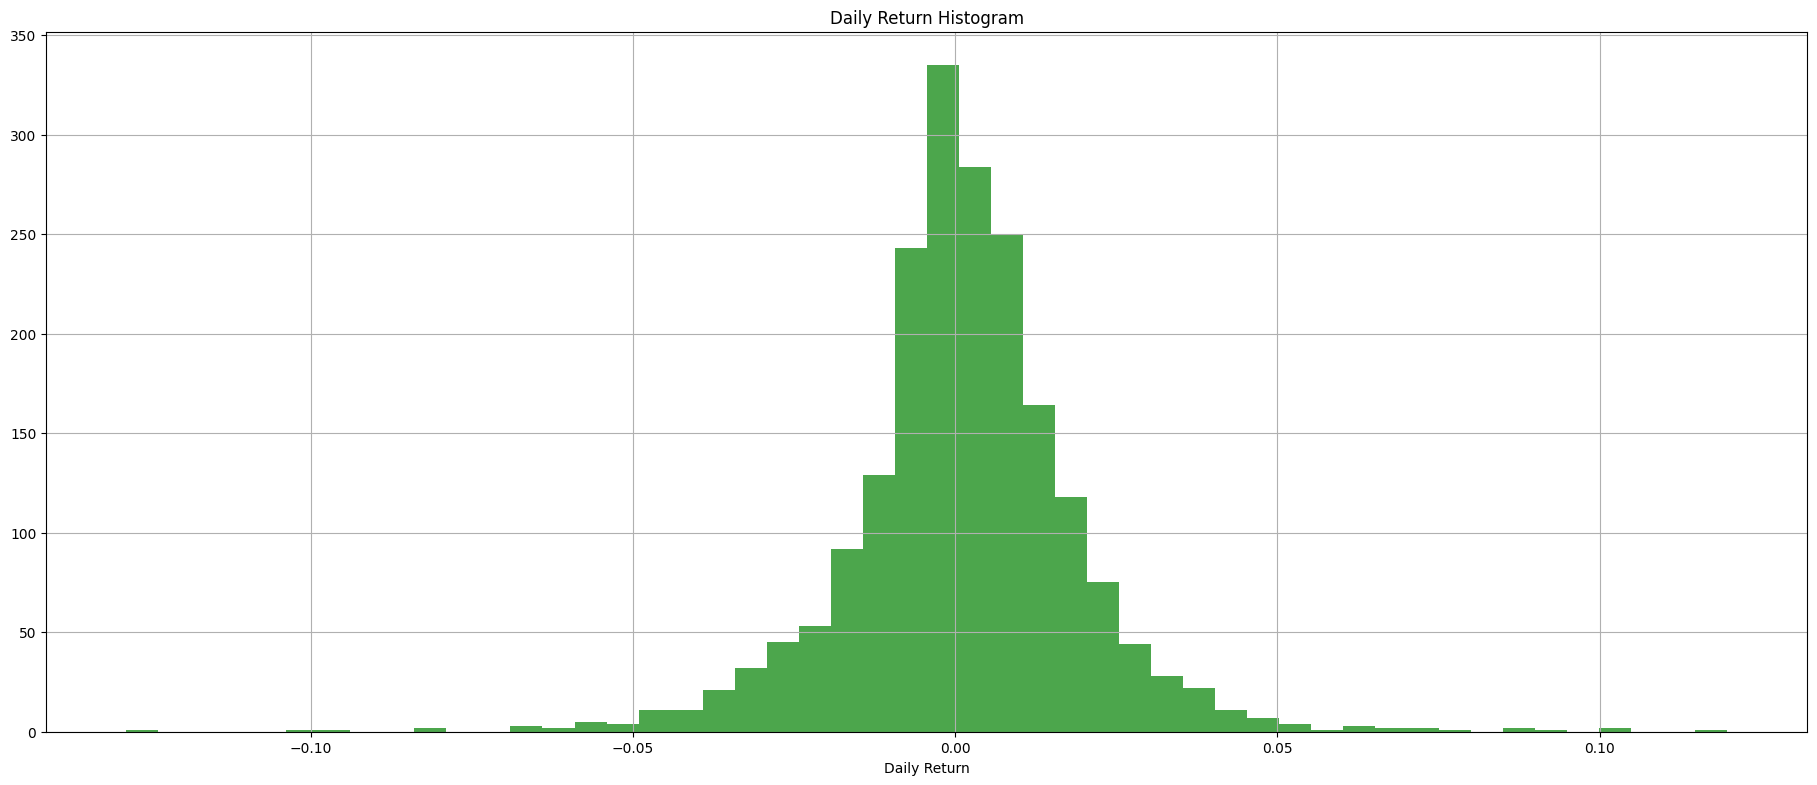

In [32]:
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 3)
df['Daily Return'] = df['Adj Close'].pct_change()
df['Daily Return'].hist(bins=50, color='green', alpha=0.7)
plt.title('Daily Return Histogram')
plt.xlabel('Daily Return')

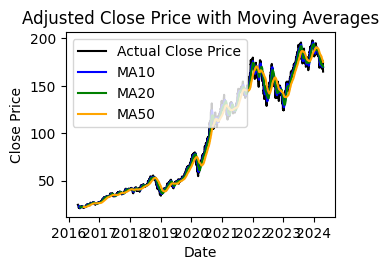

In [33]:
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Adj Close'], label='Actual Close Price', color='black')
df['MA10'] = df['Adj Close'].rolling(window=10).mean()
df['MA20'] = df['Adj Close'].rolling(window=20).mean()
df['MA50'] = df['Adj Close'].rolling(window=50).mean()
plt.plot(df.index, df['MA10'], label='MA10', color='blue')
plt.plot(df.index, df['MA20'], label='MA20', color='green')
plt.plot(df.index, df['MA50'], label='MA50', color='orange')
plt.title('Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

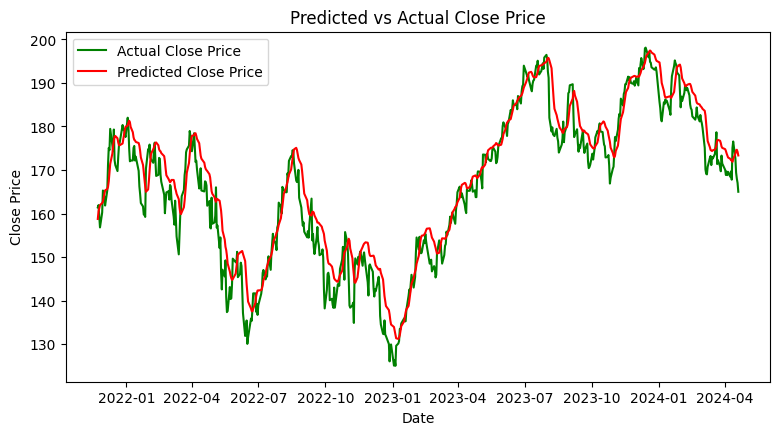

In [34]:
plt.figure(figsize=(20, 10))

# Actual vs Predicted Close Price
plt.subplot(2, 2, 1)
plt.plot(valid.index, valid['Close'], label='Actual Close Price', color='green')
plt.plot(valid.index, predictions, label='Predicted Close Price', color='red')
plt.title('Predicted vs Actual Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

In [35]:
# Display Predicted and Actual Values
print("Date\t\tActual\t\tPredicted")
for date, actual, predicted in zip(valid.index, valid['Close'], predictions):
    print(f"{date.date()}\t{actual:.2f}\t{predicted:.2f}")


Date		Actual		Predicted
2021-11-23	161.41	158.76
2021-11-24	161.94	160.48
2021-11-26	156.81	161.95
2021-11-29	160.24	162.40
2021-11-30	165.30	162.73
2021-12-01	164.77	163.61
2021-12-02	163.76	164.57
2021-12-03	161.84	165.32
2021-12-06	165.32	165.62
2021-12-07	171.18	166.11
2021-12-08	175.08	167.38
2021-12-09	174.56	169.37
2021-12-10	179.45	171.40
2021-12-13	175.74	173.79
2021-12-14	174.33	175.54
2021-12-15	179.30	176.55
2021-12-16	172.26	177.69
2021-12-17	171.14	177.81
2021-12-20	169.75	177.29
2021-12-21	172.99	176.32
2021-12-22	175.64	175.71
2021-12-23	176.28	175.69
2021-12-27	180.33	176.08
2021-12-28	179.29	177.14
2021-12-29	179.38	178.26
2021-12-30	178.20	179.27
2021-12-31	177.57	179.92
2022-01-03	182.01	180.22
2022-01-04	179.70	180.88
2022-01-05	174.92	181.32
2022-01-06	172.00	180.97
2022-01-07	172.17	179.92
2022-01-10	172.19	178.68
2022-01-11	175.08	177.52
2022-01-12	175.53	176.94
2022-01-13	172.19	176.79
2022-01-14	173.07	176.46
2022-01-18	169.80	176.20
2022-01-19	166.23	175.58
2